<a href="https://colab.research.google.com/github/bilalProgTech/mtech-data-science/blob/master/Deep-Learning/MTech-DS-DL-BilalHungund-D013-A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analytics Vidhya Identify the Digits Challenge Solution: https://github.com/bilalProgTech/online-data-science-ml-challenges/tree/master/AV-Identify-The-Digits

Anlytics Vidhya Identify the Apparel Solution: https://github.com/bilalProgTech/online-data-science-ml-challenges/tree/master/AV-Identify-The-Digits

# CIFAR - 100

In [1]:
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test) = cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test = X_train/255.0,X_test/255.0

169009152/169001437 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


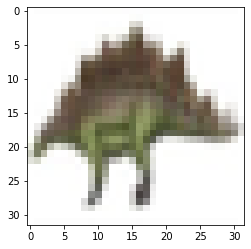

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model = tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2, 2)),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(100)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [4]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.5746 - accuracy: 0.0186 - val_loss: 4.4469 - val_accuracy: 0.0261
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.2480 - accuracy: 0.0493 - val_loss: 4.1074 - val_accuracy: 0.0681
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 3.9710 - accuracy: 0.0935 - val_loss: 3.8489 - val_accuracy: 0.1160
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 3.7620 - accuracy: 0.1315 - val_loss: 3.7451 - val_accuracy: 0.1329
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 3.5902 - accuracy: 0.1613 - val_loss: 3.5858 - val_accuracy: 0.1647
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 3.4442 - accuracy: 0.1866 - val_loss: 3.5126 - val_accuracy: 0.1710
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 3.3032 - accuracy: 0.2096 - val_loss: 3.3536 - val_accuracy:

313/313 - 1s - loss: 2.6054 - accuracy: 0.3594


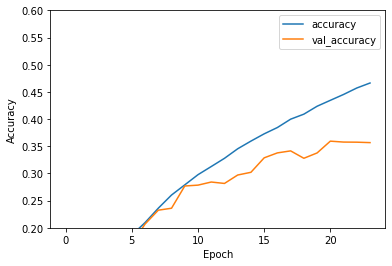

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# Fashion-MNIST

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [7]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = X_train.reshape(60000,28*28*1)
X_test = X_test.reshape(10000,28*28*1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#preprocessing
X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
initializers = tf.keras.initializers.glorot_normal()

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6552 - accuracy: 0.7804 - val_loss: 0.4963 - val_accuracy: 0.8222
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4470 - accuracy: 0.8429 - val_loss: 0.4460 - val_accuracy: 0.8431
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4026 - accuracy: 0.8585 - val_loss: 0.4522 - val_accuracy: 0.8403
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8677 - val_loss: 0.3973 - val_accuracy: 0.8583
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3522 - accuracy: 0.8746 - val_loss: 0.3754 - val_accuracy: 0.8664
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3355 - accuracy: 0.8796 - val_loss: 0.3636 - val_accuracy: 0.8696
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3221 - accuracy: 0.8840 - val_loss: 0.3607 - val_accuracy:

313/313 - 1s - loss: 0.3636 - accuracy: 0.8696


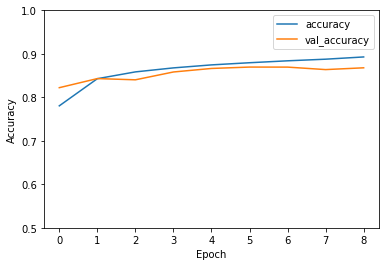

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# MNIST-Digits

In [11]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28*28*1)
X_test = X_test.reshape(10000,28*28*1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#preprocessing
X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

initializers = tf.keras.initializers.glorot_normal()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
                                    tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5168 - accuracy: 0.8693 - val_loss: 0.2568 - val_accuracy: 0.9257
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2274 - accuracy: 0.9344 - val_loss: 0.1948 - val_accuracy: 0.9442
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9506 - val_loss: 0.1533 - val_accuracy: 0.9543
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1402 - accuracy: 0.9597 - val_loss: 0.1315 - val_accuracy: 0.9613
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1176 - accuracy: 0.9659 - val_loss: 0.1129 - val_accuracy: 0.9668
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9708 - val_loss: 0.1050 - val_accuracy: 0.9681
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - l

313/313 - 1s - loss: 0.0621 - accuracy: 0.9812


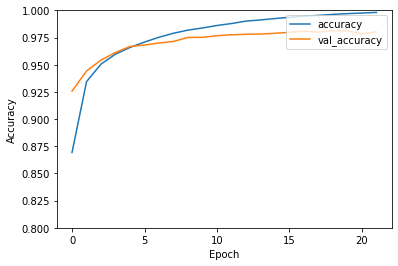

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)